## Forex data gathering and cleaning

In [2]:
# Imports
import pandas as pd
from pathlib import Path

In [3]:
# Set file path
file_path = Path("../data/forex_data/raw/forexdata_raw.csv")

# Create dataframe
forex_df = pd.read_csv(file_path)

In [4]:
# Get 1 years worth of data (252 trading days)
forex_one_year = forex_df.loc[:251]

In [5]:
# Write to CSV
#forex_one_year.to_csv(f"..//data/forex_data/raw/forex_one_year_raw.csv", index = False)

In [6]:
# Slice the data into seperate dataframes for USD, JPY, GBP, AUD, RUB, CNY, KRW, HKD, INR
forex_euro_usd = forex_one_year.loc[:,["Date", "USD"]]
forex_euro_jpy = forex_one_year.loc[:,["Date", "JPY"]]
forex_euro_gbp = forex_one_year.loc[:,["Date", "GBP"]]
forex_euro_aud = forex_one_year.loc[:,["Date", "AUD"]]
forex_euro_rub = forex_one_year.loc[:,["Date", "RUB"]]
forex_euro_cny = forex_one_year.loc[:,["Date", "CNY"]]
forex_euro_krw = forex_one_year.loc[:,["Date", "KRW"]]
forex_euro_hkd = forex_one_year.loc[:,["Date", "HKD"]]
forex_euro_inr = forex_one_year.loc[:,["Date", "INR"]]

In [7]:
# Write to CSV
forex_euro_usd.to_csv(f"..//data/forex_data/raw/forex_euro_usd.csv", index = False)
forex_euro_jpy.to_csv(f"..//data/forex_data/raw/forex_euro_jpy.csv", index = False)
forex_euro_gbp.to_csv(f"..//data/forex_data/raw/forex_euro_gbp.csv", index = False)
forex_euro_aud.to_csv(f"..//data/forex_data/raw/forex_euro_aud.csv", index = False)
forex_euro_rub.to_csv(f"..//data/forex_data/raw/forex_euro_rub.csv", index = False) 
forex_euro_cny.to_csv(f"..//data/forex_data/raw/forex_euro_cny.csv", index = False)
forex_euro_krw.to_csv(f"..//data/forex_data/raw/forex_euro_krw.csv", index = False)
forex_euro_hkd.to_csv(f"..//data/forex_data/raw/forex_euro_hkd.csv", index = False)
forex_euro_inr.to_csv(f"..//data/forex_data/raw/forex_euro_inr.csv", index = False)

In [8]:
forex_one_year_clean = pd.concat([forex_euro_usd, forex_euro_jpy, forex_euro_gbp, forex_euro_aud, forex_euro_rub, forex_euro_cny, forex_euro_krw, forex_euro_hkd, forex_euro_inr], axis = "columns", join = "inner")

In [9]:
forex_one_year_no_dates = forex_one_year_clean.drop("Date", axis = 1)

In [10]:
forex_one_year_clean_dates = pd.concat([forex_one_year_no_dates, forex_euro_usd["Date"]], axis = "columns", join = "inner")

In [11]:
forex_one_year_clean_dates = forex_one_year_clean_dates[["Date", "USD", "JPY", "GBP", "AUD", "RUB", "CNY", "KRW", "HKD", "INR"]]

In [12]:
# Write to CSV
forex_one_year_clean_dates.to_csv(f"..//data/forex_data/clean/forex_one_year_clean.csv", index = False)

In [13]:
forex_one_year_clean_dates = forex_one_year_clean_dates.set_index("Date")

## Import BTC Data

In [14]:
# Set file path for BTC
file_path = Path("../data/crypto_data/output_batch_combined_BTC.csv")

# Create dataframe
BTC_df = pd.read_csv(file_path)

In [15]:
BTC_df = BTC_df.drop("Unnamed: 0", axis = 1)

In [16]:
BTC_df = BTC_df.drop(["Low", "High", "Open", "Volume"], axis = 1)

In [17]:
BTC_df = BTC_df.set_index("Date")

## Combine BTC and Forex Data

In [18]:
# Slice the forex data to only include USD, RUB, KRW, and INR.
forex_df_mini = forex_one_year_clean_dates.drop(["JPY", "GBP", "AUD", "CNY", "HKD"], axis = 1)

In [19]:
# Concat the 2 datadrames
BTC_forex_df = pd.concat([BTC_df, forex_df_mini], axis= "columns", join= "inner")
BTC_forex_df = BTC_forex_df.rename(columns = {'Close':'BTC'})

In [20]:
BTC_forex_df.sort_index(ascending=True, inplace= True)

BTC_forex_df = BTC_forex_df.drop("Crypto", axis = 1)

## Plots

In [29]:
#Imports
import seaborn as sns
import hvplot.pandas
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [22]:
# Daily Returns
returns_daily = BTC_forex_df.pct_change().dropna()

[Text(0.5, 15.0, 'Currency'),
 Text(33.0, 0.5, 'Currency'),
 Text(0.5, 1.0, 'Currency Correlation')]

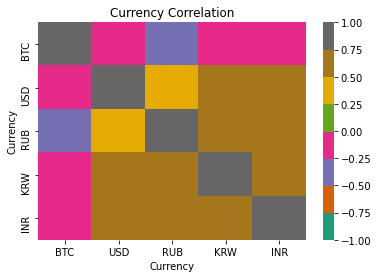

In [23]:
# Correlation
BTC_forex_corr = returns_daily.corr()

# Correlation Heatmap
BTC_forex_corr_plot = sns.heatmap(BTC_forex_corr, vmin = -1, vmax = 1, cmap = "Dark2")
BTC_forex_corr_plot.set(
    xlabel = "Currency", 
    ylabel = "Currency",
    title = "Currency Correlation")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Returns')]

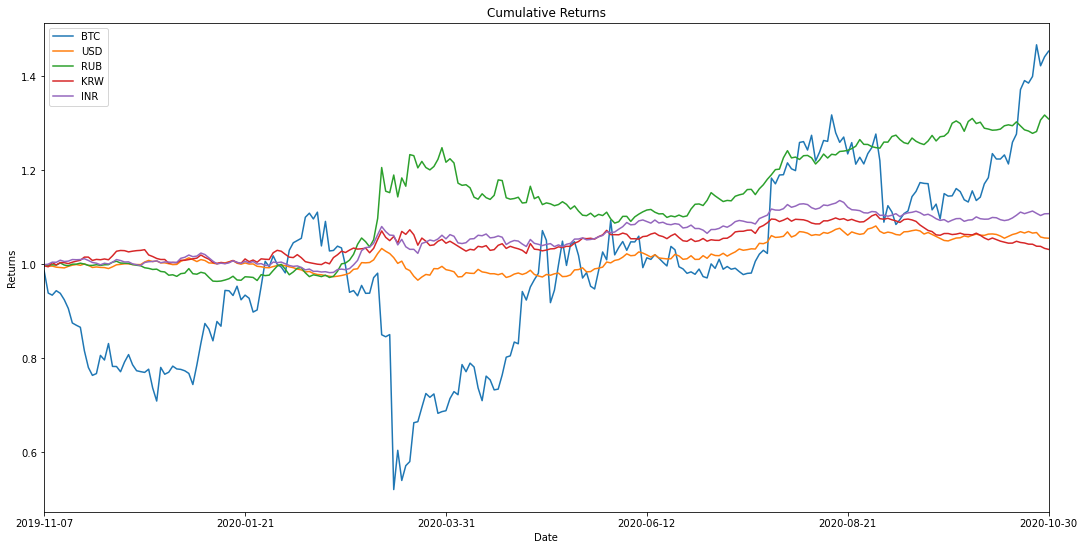

In [24]:
# Cumulative Returns
BTC_forex_cum = (1 + returns_daily).cumprod()

# Cumulative Returns Plot
BTC_forex_cum_plot = BTC_forex_cum.plot(
    title = "Cumulative Returns",
    figsize = (18,9),
)
BTC_forex_cum_plot.set(
    xlabel = "Date",
    ylabel = "Returns"
)

[Text(0.5, 0, 'Currency'), Text(0, 0.5, 'Ratio')]

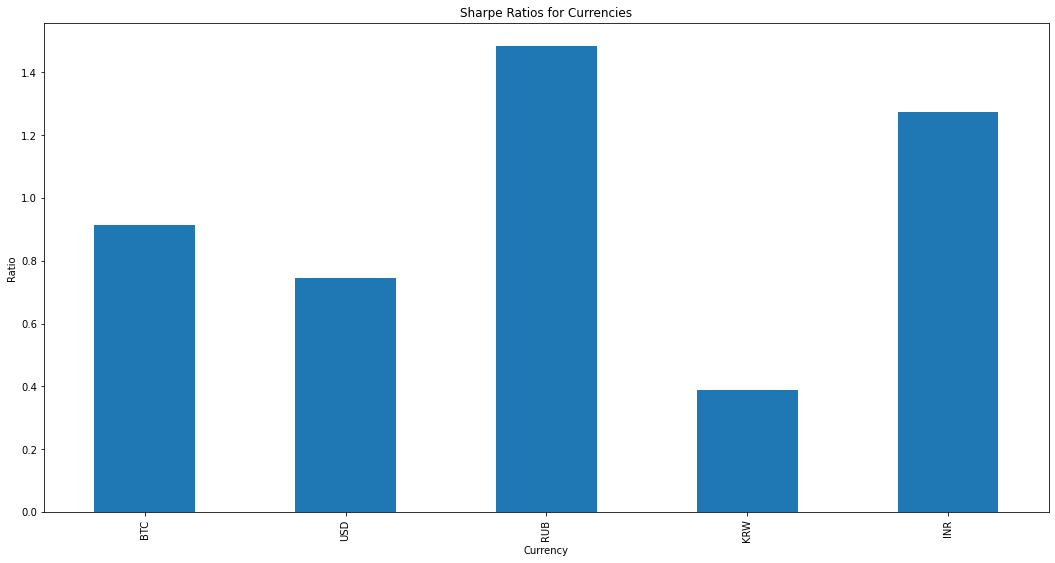

In [25]:
# Daily STD Dev
BTC_forex_daily_std = returns_daily.std()

# Annualized STD
BTC_forex_annual_std = BTC_forex_daily_std * np.sqrt(252)

# Sharpe Ratio
BTC_forex_sharpe = (returns_daily.mean() * 252) / BTC_forex_annual_std

# Sharpe Ratio Plot
BTC_forex_sharpe_plot = BTC_forex_sharpe.plot(
    kind = "bar",
    title = "Sharpe Ratios for Currencies",
    figsize = (18,9)
)
BTC_forex_sharpe_plot.set(
    xlabel = "Currency",
    ylabel = "Ratio"
)

<AxesSubplot:title={'center':'30 Day Rolling Average'}, xlabel='Date', ylabel='Average'>

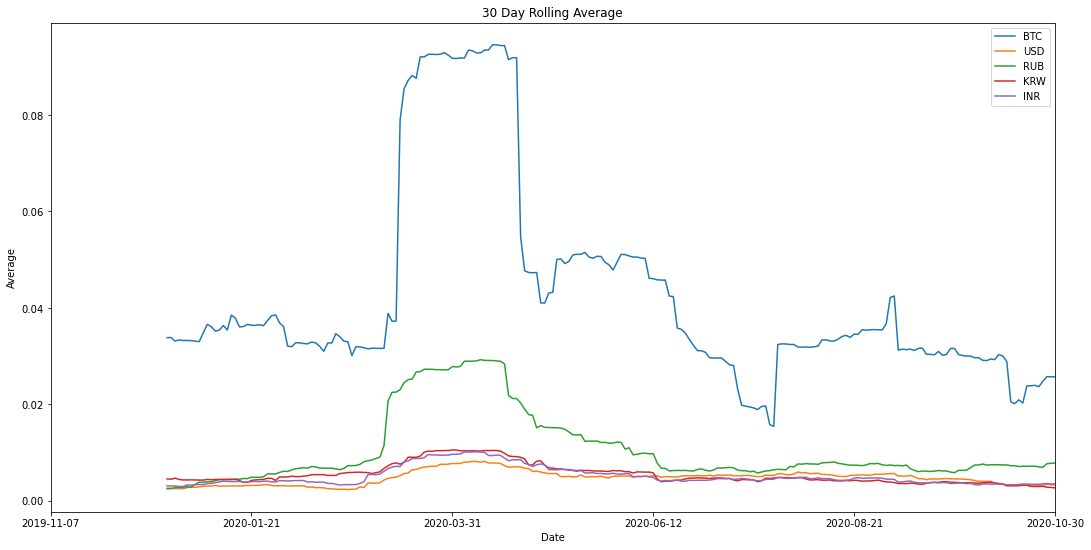

In [40]:
# Rolling Std Dev
BTC_forex_rolling = returns_daily.rolling(window = 30).std().plot(
    kind = "line",
    title = "30 Day Rolling Average",
    figsize = (18,9)
)
BTC_forex_rolling.set(
    xlabel = "Date",
    ylabel = "Average",
)
BTC_forex_rolling